In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def Z_line(freq, Z0, ZL, l):
    beta = 2*np.pi/(300/freq)
    alpha = 0.5
    gamma = alpha+1j*beta
    Z_line = Z0*(ZL+(Z0*np.tanh(gamma*l)))/(Z0+(ZL*np.tanh(gamma*l)))
    return (Z_line)   

In [33]:
freq = np.loadtxt("tl_50cm_open.s1p", usecols=0, skiprows=1)/1e6
S11_open = np.loadtxt("tl_50cm_open.s1p", usecols=1, skiprows=1) + np.loadtxt("tl_50cm_open.s1p", usecols=2, skiprows=1)*1j
S11_short = np.loadtxt("tl_50cm_short.s1p", usecols=1, skiprows=1) + np.loadtxt("tl_50cm_short.s1p", usecols=2, skiprows=1)*1j

Z_open = 50*(1+S11_open)/(1-S11_open)
Z_short = 50*(1+S11_short)/(1-S11_short)
Z_char = np.sqrt(Z_open*Z_short)

wl = (300/freq)

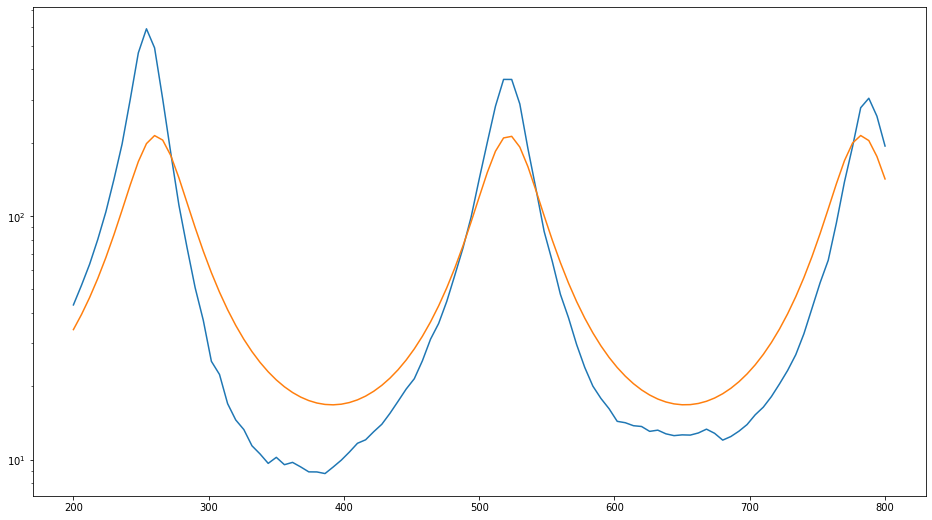

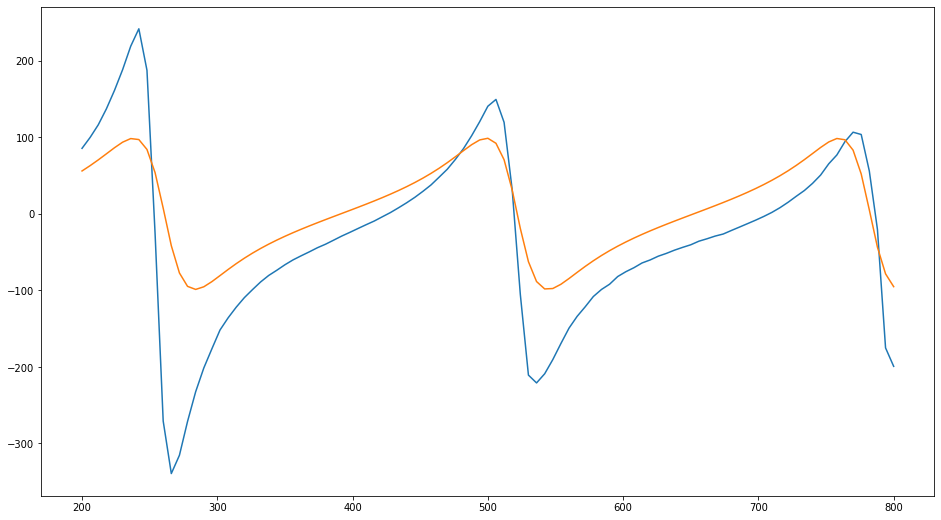

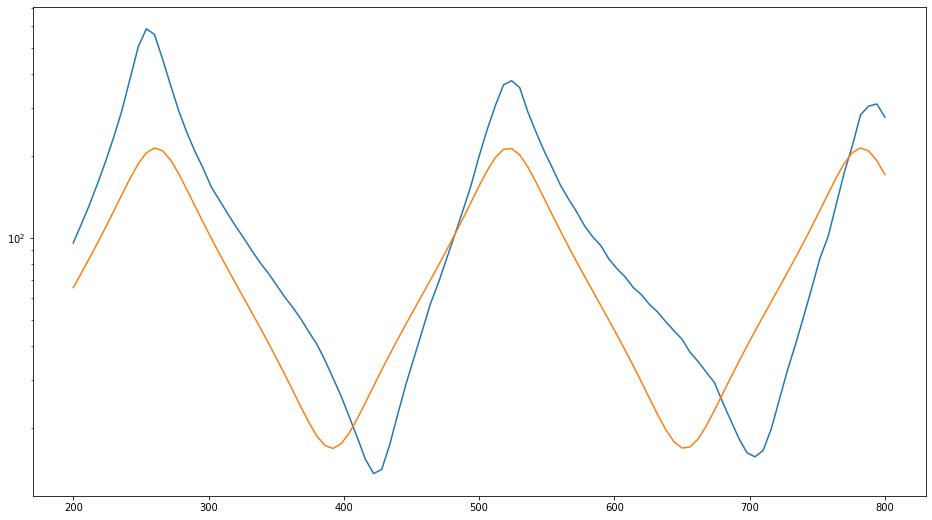

In [34]:
length = 0.575
Z_line_impe = 60
line_impedance = Z_line(freq, Z_line_impe, 1e9, length)

plt.figure(figsize=(16,9))
plt.semilogy(freq, np.real(Z_open))
plt.semilogy(freq, np.real(line_impedance))

plt.figure(figsize=(16,9))
plt.plot(freq, np.imag(Z_open))
plt.plot(freq, np.imag(line_impedance))

plt.figure(figsize=(16,9))
plt.semilogy(freq, np.abs(Z_open))
plt.semilogy(freq, np.abs(line_impedance))

In [5]:
# plt.figure(figsize=(16,9))
# plt.plot(freq, np.real(Z_char))
# plt.plot(freq, np.imag(Z_char))

# plt.figure(figsize=(10,10))
# plt.plot(np.real(Z_char), np.imag(Z_char))

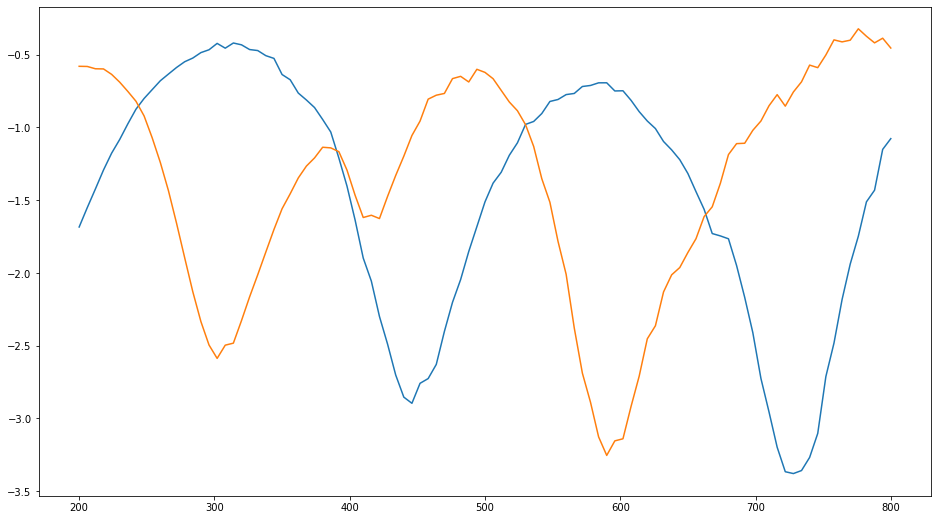

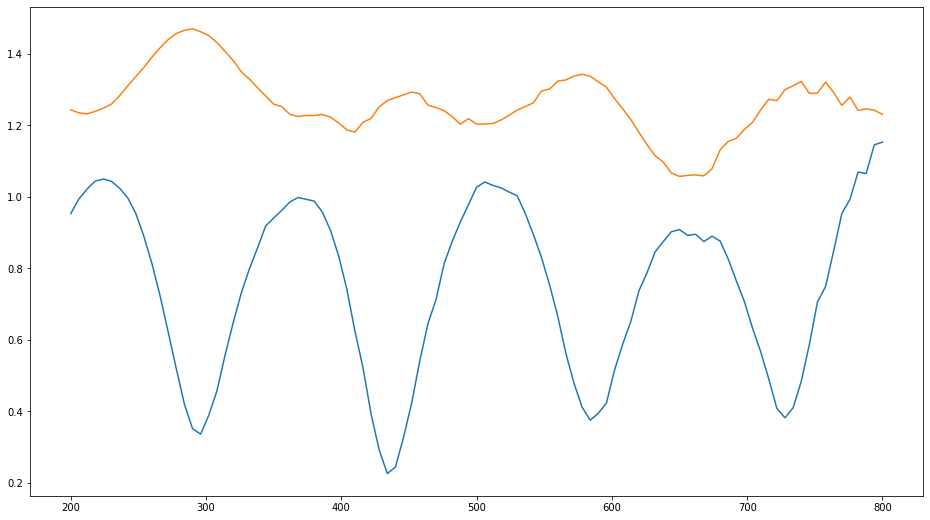

In [6]:
plt.figure(figsize=(16,9))
plt.plot(freq, 10*np.log10(np.abs(S11_open)))
plt.plot(freq, 10*np.log10(np.abs(S11_short)))

plt.figure(figsize=(16,9))
plt.plot(freq, (np.abs(S11_open+S11_short)))
plt.plot(freq, (np.abs(S11_open-S11_short)))